In [1]:
import io
import requests

from PIL import Image as im

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [46]:


r = requests.post(
  'https://fink-portal.org/api/v1/latests',
  json={
    'class': 'Solar System MPC',
    #'class': 'All classes',
    'n': '100',                         
    'startdate': '2024-02-01',  
    'stopdate': '2024-02-07'    
  }
)

pdf = pd.read_json(io.BytesIO(r.content))



In [47]:
pdf


,d:jdstarthist_dt,d:nalerthist,i:jdstarthist,d:mangrove_2MASS_name,d:jd_first_real_det,d:x3hsp,i:ssmagnr,d:t2_KN,i:chipsf,i:dec,...,d:mangrove_lum_dist,i:classtar,d:anomaly_score,d:from_upper,d:tracklet,v:classification,v:lastdate,v:firstdate,v:lapse,v:constellation
0,-26.845197,1,2.460342e+06,None,2.460315e+06,Unknown,18.9,0,1.207523,8.200624,...,None,0.975,-0.011024,True,,Solar System MPC,2024-02-01 06:06:27.996,2024-02-01 06:06:27.996,0.000000,Leo
1,-26.845197,1,2.460342e+06,None,2.460315e+06,Unknown,19.1,0,1.488522,12.823408,...,None,0.965,-0.011218,True,,Solar System MPC,2024-02-01 06:06:27.996,2024-02-01 06:06:27.996,0.000000,Leo
2,-26.845197,1,2.460342e+06,None,2.460315e+06,Unknown,19.1,0,0.899330,13.208186,...,None,0.872,-0.011226,True,,Solar System MPC,2024-02-01 06:06:27.996,2024-02-01 06:06:27.996,0.000000,Leo
3,-26.845197,1,2.460342e+06,None,2.460315e+06,Unknown,19.5,0,1.397281,12.044636,...,None,0.961,-0.011226,True,,Solar System MPC,2024-02-01 06:06:27.996,2024-02-01 06:06:27.996,0.000000,Leo
4,2112.136007,1,2.458203e+06,None,2.460315e+06,Unknown,18.7,0,1.505966,11.906562,...,None,0.959,-0.011122,True,,Solar System MPC,2024-02-01 06:06:27.996,2018-03-25 06:33:31.997,2138.981204,Leo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-25.952060,1,2.460342e+06,None,2.460316e+06,Unknown,18.9,0,1.848356,-1.833114,...,None,0.978,-0.010998,True,,Solar System MPC,2024-02-01 06:03:44.001,2024-02-01 06:03:44.001,0.000000,Hydra
96,-26.840474,1,2.460342e+06,None,2.460315e+06,Unknown,17.5,0,5.893563,-5.484364,...,None,0.998,-0.010992,True,,Solar System MPC,2024-02-01 06:03:44.001,2024-02-01 06:03:44.001,0.000000,Hydra
97,-25.952060,1,2.460342e+06,None,2.460316e+06,Unknown,17.3,0,11.652064,-4.701275,...,None,0.983,-0.010931,True,,Solar System MPC,2024-02-01 06:03:44.001,2024-02-01 06:03:44.001,0.000000,Hydra
98,-25.952060,1,2.460342e+06,None,2.460316e+06,Unknown,18.9,0,1.055827,-4.855045,...,None,0.971,-0.011218,True,,Solar System MPC,2024-02-01 06:03:44.001,2024-02-01 06:03:44.001,0.000000,Hydra


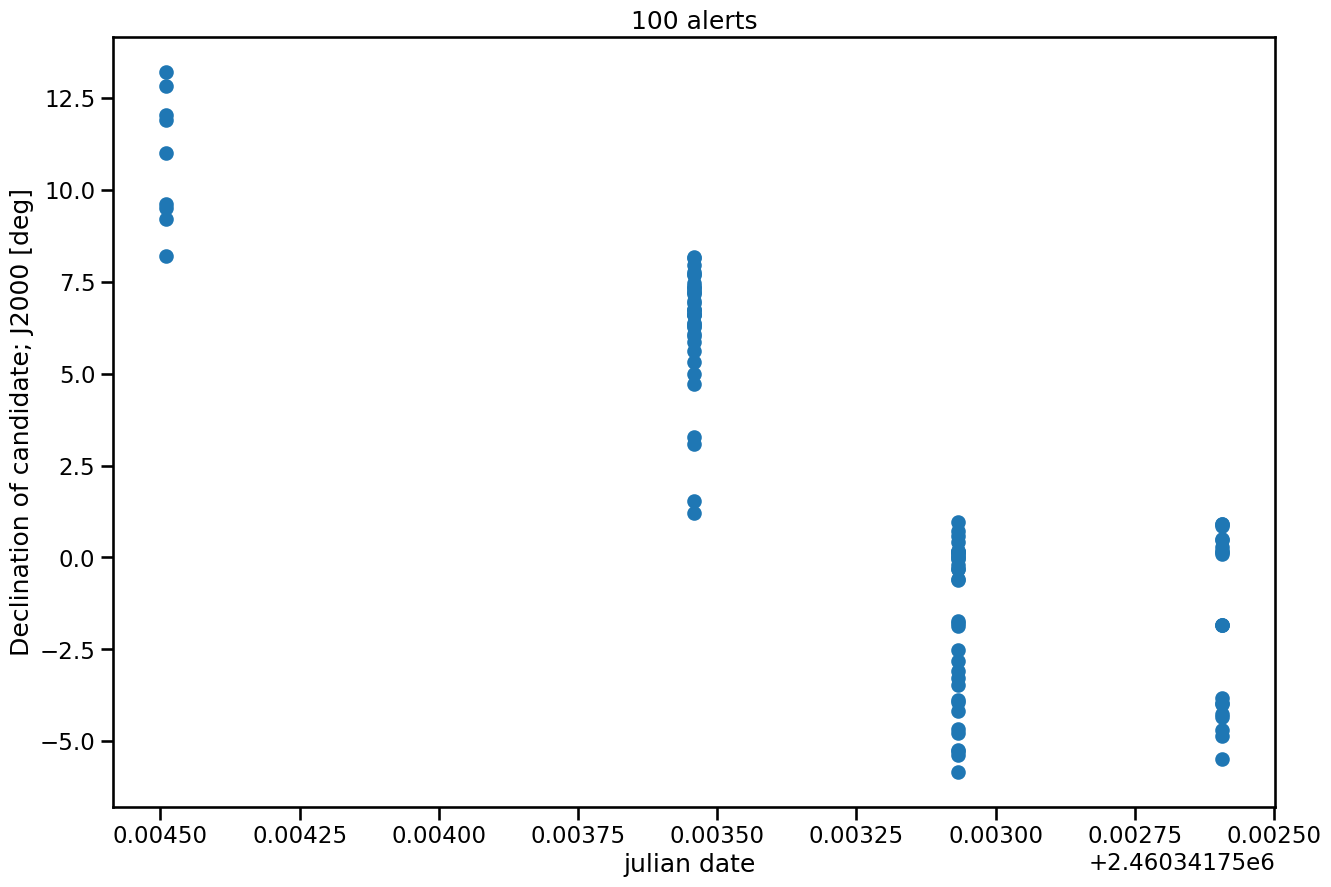

In [48]:
fig = plt.figure(figsize=(15, 10))

plt.scatter(
    pdf['i:jd'], pdf['i:dec'], 
    marker='o'
)

plt.gca().invert_xaxis()
plt.title('100 alerts')
plt.xlabel('julian date ')
plt.ylabel('Declination of candidate; J2000 [deg]');

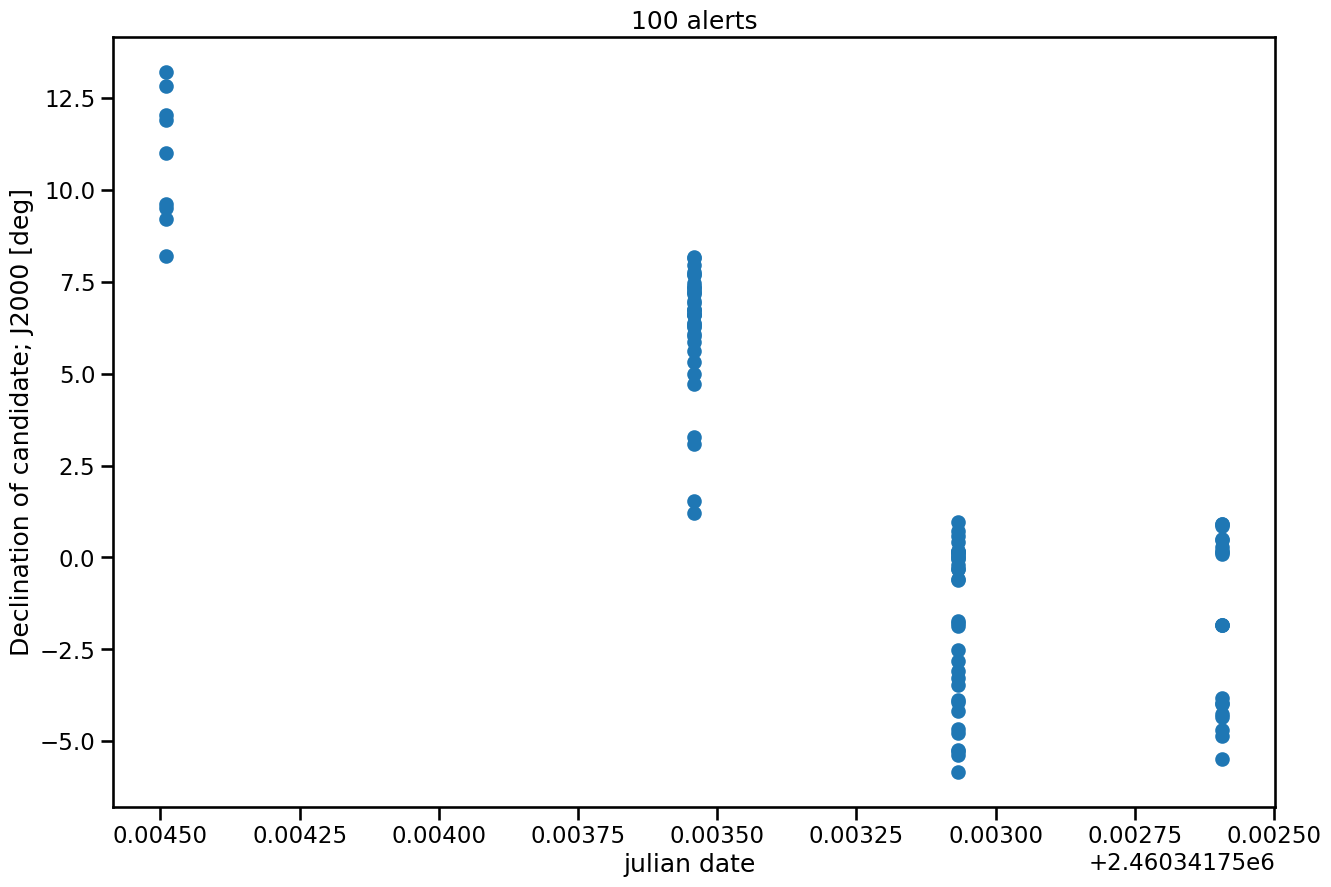

In [49]:
fig = plt.figure(figsize=(15, 10))

plt.scatter(
    pdf['i:jd'], pdf['i:dec'], 
    marker='o'
)

plt.gca().invert_xaxis()
plt.title('100 alerts')
plt.xlabel('julian date ')
plt.ylabel('Declination of candidate; J2000 [deg]');

In [63]:
pdf['i:magnr']

0     22.438
1     22.669
2     21.103
3     22.336
4     21.728
       ...  
95    22.811
96    22.786
97    22.917
98    22.705
99    22.667
Name: i:magnr, Length: 100, dtype: float64

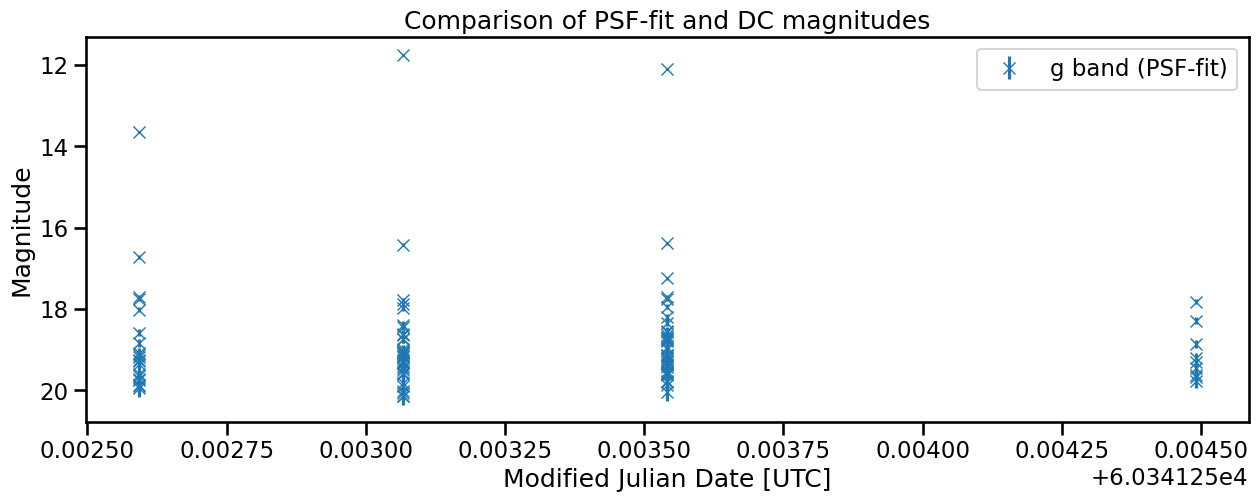

In [64]:
fig = plt.figure(figsize=(15, 5))

colordic = {1: 'C0', 2: 'C1'}
filtdic = {1: 'g', 2: 'r'}

for filt in np.unique(pdf['i:fid']):
    maskFilt = pdf['i:fid'] == filt

    plt.errorbar(
        pdf[maskFilt]['i:jd'].apply(lambda x: x - 2400000.5),
        pdf[maskFilt]['i:magpsf'],
        pdf[maskFilt]['i:sigmapsf'],
        ls = '', marker='x', 
        color=colordic[filt], 
        label='{} band (PSF-fit)'.format(filtdic[filt]),
    )

"""    plt.errorbar(
        pdf[maskFilt]['i:jd'].apply(lambda x: x - 2400000.5),
        pdf[maskFilt]['i:magnr'],
        ls = '--', 
        color=colordic[filt], 
        label='{} ref (DC)'.format(filtdic[filt]),
    )
"""


#plt.axhline(y=ref_r, color=colordic[2], linestyle='--')
#plt.axhline(y=ref_g, color=colordic[1], linestyle='--')
plt.gca().invert_yaxis()
plt.legend()
plt.title('Comparison of PSF-fit')
plt.xlabel('Modified Julian Date [UTC]')
plt.ylabel('Magnitude');

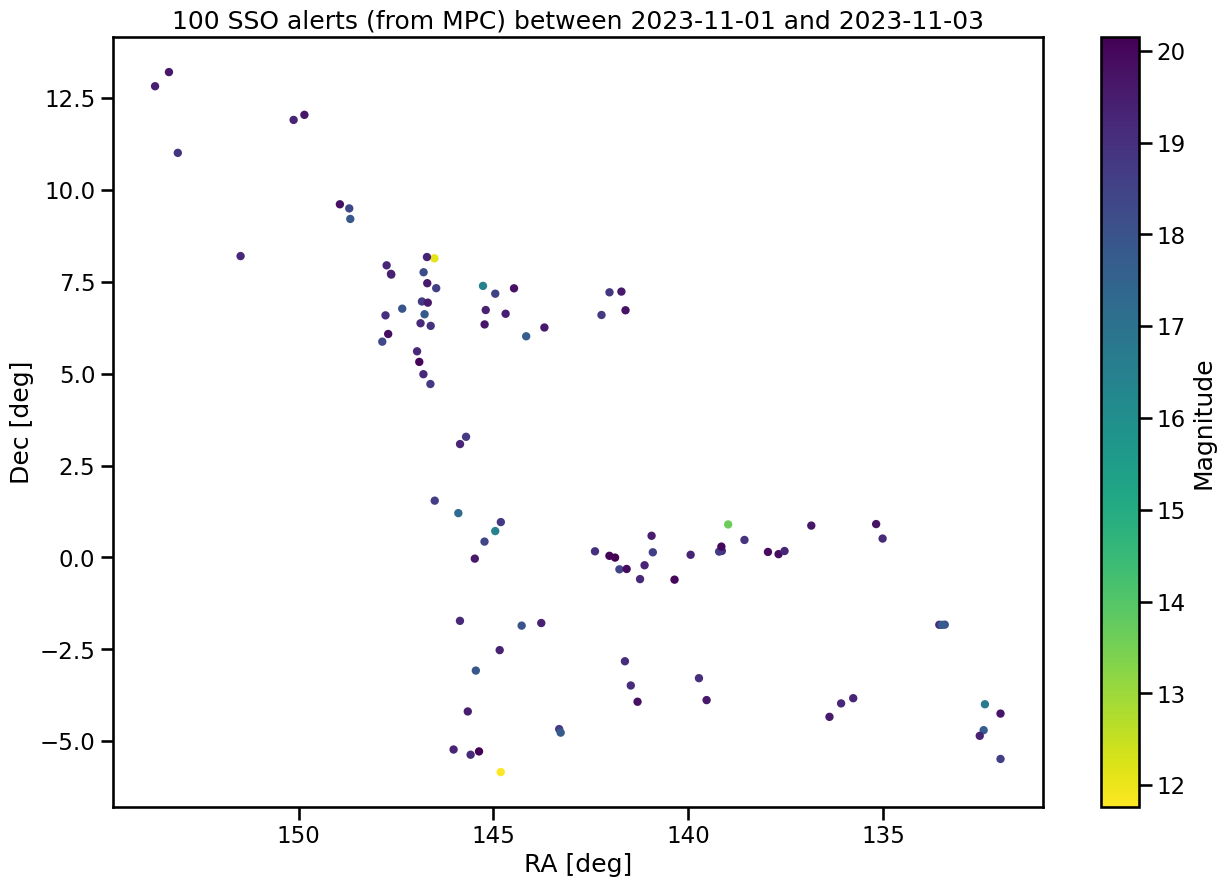

In [36]:
fig = plt.figure(figsize=(15, 10))

plt.scatter(
    pdfSSO['i:ra'], pdfSSO['i:dec'], 
    c=pdfSSO['i:magpsf'], marker='.', cmap = 'viridis_r'
)

cb = plt.colorbar(label='Magnitude')
plt.gca().invert_xaxis()
plt.title('100 SSO alerts (from MPC) between 2023-11-01 and 2023-11-03')
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]');